# Logistic Regression model on Auto dataset

We will examine how the characteristics of the car relate to the price column, which will be our outcome. We will create another column to split our cars into two categories, i.e high price cars and low price cars, our model will be built using logistic regression to predict in which price bracket a car will fall in

## Exploratory Analysis

First we import our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [5]:
# We will delete the rows with "?" as their is no clear mea, median
df = df[df['normalized-losses'] !='?']

In [6]:
df['normalized-losses'].value_counts()

normalized-losses
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          164 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               164 non-null    object 
 3   fuel-type          164 non-null    object 
 4   aspiration         164 non-null    object 
 5   num-of-doors       164 non-null    object 
 6   body-style         164 non-null    object 
 7   drive-wheels       164 non-null    object 
 8   engine-location    164 non-null    object 
 9   wheel-base         164 non-null    float64
 10  length             164 non-null    float64
 11  width              164 non-null    float64
 12  height             164 non-null    float64
 13  curb-weight        164 non-null    int64  
 14  engine-type        164 non-null    object 
 15  num-of-cylinders   164 non-null    object 
 16  engine-size        164 non-null

In [8]:
# check for null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# we will replace the "?" with nan so we can see them when checking for null
df.replace('?', np.nan, inplace=True)

In [10]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

we will check all 3 columns with nan to decide how to replace them 

In [11]:
df['num-of-doors'].value_counts()

num-of-doors
four    95
two     68
Name: count, dtype: int64

In [12]:
df['bore'].value_counts()

bore
3.62    20
3.19    15
3.15    15
2.97    12
3.03    10
3.78     7
2.91     7
3.27     6
3.31     6
3.05     6
3.43     6
3.54     5
3.39     5
3.58     5
3.35     4
3.01     4
3.46     4
3.17     3
3.7      3
3.33     2
3.5      2
3.24     2
3.13     1
3.34     1
3.76     1
3.61     1
3.94     1
3.08     1
2.54     1
3.63     1
2.92     1
3.6      1
2.99     1
Name: count, dtype: int64

In [13]:
df['stroke'].value_counts()

stroke
3.03    14
3.15    14
3.4     13
3.23    12
2.64    11
3.29     9
3.39     9
3.46     8
3.5      6
3.35     6
3.41     6
3.07     6
3.58     6
3.27     6
3.54     4
3.64     4
3.19     4
3.47     3
3.52     3
3.11     3
2.8      2
3.08     2
3.1      1
3.16     1
2.19     1
3.21     1
2.07     1
2.36     1
4.17     1
3.9      1
2.87     1
Name: count, dtype: int64

Since replacing with the mean or median will not really be accurate and the rows with nan are few, we will delete them

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
# reset the index
df = df.reset_index(drop=True)

In [17]:
# change the type of some variables from object to float
df[['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm', 'price']].astype(float)

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
2,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
3,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
4,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


Our Auto dataframe is now ready for Machine Learning

## Logistic Regression

In [19]:
df['high_price']  = 0
df.loc[df["price"] > 15000, "high_price"] = 1

In [20]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,high_price
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1
2,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,1
3,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,1
4,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,1
155,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,1
156,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,1
157,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,1


In [21]:
X = df.drop(['price', 'high_price'], axis=1)
y = df['high_price']

In [22]:
# Using train test split for our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=731)

In [23]:
# counting to see if our training and test sets have a good distribution in the high_price column
lows_train = sum(y_train == 0)
highs_train = sum(y_train == 1)
lows_test = sum(y_test == 0)
highs_test = sum(y_test == 1)

In [24]:
lows_train 

94

In [25]:
highs_train 

33

In [26]:
lows_test

25

In [27]:
highs_test

7

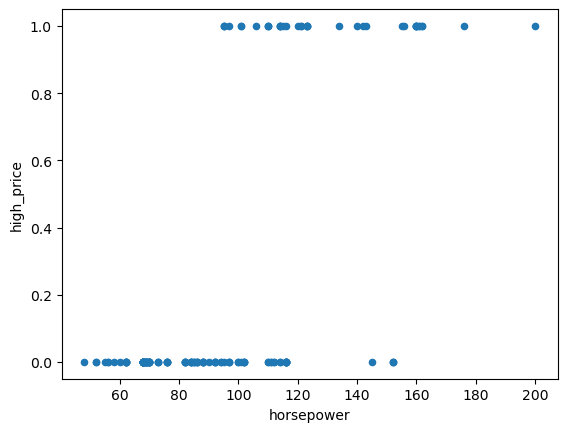

In [28]:
df.plot.scatter(x="horsepower", y="high_price")
plt.show()

From the graph we can clearly see that as horsepower increases so does the price

In [29]:
# Instantiate the logistic regression
lm = LogisticRegression()

In [30]:
# Using horsepower alone as our predictor feature
X_sub = X_train[["horsepower"]]
fit = lm.fit(X_sub, y_train)

In [31]:
# Calculate for the intercept
intercept = lm.intercept_
intercept

array([-8.8935548])

In [32]:
# Calculate the accuracy of the model
accuracy = lm.score(X_sub, y_train)
accuracy

0.8740157480314961

In [33]:
predictions = lm.predict(X_sub)

In [34]:
# Calculate for the sensitivity
tp = sum((y_train == 1) & (predictions == 1))
fn = sum((y_train == 1) & (predictions == 0))
sensitivity = tp / (tp + fn)
sensitivity

0.6060606060606061

In [35]:
# Calculate the Specifity
tn = sum((y_train == 0) & (predictions == 0))
fp = sum((y_train == 0) & (predictions == 1))
specificity = tn / (tn + fp)
specificity

0.9680851063829787

In [36]:
# Positive Predictive Value
tp = sum((y_train == 1) & predictions == 1)
fp = sum((y_train == 0) & predictions == 1)
ppv = tp / (tp + fp)
ppv

0.8695652173913043

In [37]:
# Negative Predictive Value
tn = sum((y_train == 0) & (predictions == 0))
fn = sum((y_train == 1) & (predictions == 0))
npv = tn / (tn + fn)
npv

0.875

In [38]:
# Caclulate the odds
odds = np.exp(intercept)
odds

array([0.00013727])

In [39]:
log_or = lm.coef_[0,0]
log_or

0.0744875648398149

In [40]:
# Calculate the odds ratio
odds_ratio = np.exp(log_or)
odds_ratio

1.07733194664363

Using horsepower and highway-mpg as our predictors

In [41]:
X_subs = X_train[['horsepower', 'highway-mpg']]

In [42]:
lm.fit(X_subs, y_train)

LogisticRegression()

In [43]:
lm.intercept_

array([5.24397563])

In [44]:
horsepower_or = np.exp(lm.coef_[0, 0])
highway_mpg_or = np.exp(lm.coef_[0, 1])

In [45]:
horsepower_or

1.0338298356554507

In [46]:
highway_mpg_or

0.7147381153268761

In [47]:
probs = lm.predict_proba(X_subs)
probs

array([[8.98060271e-01, 1.01939729e-01],
       [9.98960724e-01, 1.03927607e-03],
       [9.14938054e-01, 8.50619456e-02],
       [9.74568797e-01, 2.54312028e-02],
       [8.08088445e-01, 1.91911555e-01],
       [9.29241616e-01, 7.07583836e-02],
       [9.68935212e-01, 3.10647879e-02],
       [9.39249828e-01, 6.07501719e-02],
       [9.92508205e-01, 7.49179530e-03],
       [5.90665314e-01, 4.09334686e-01],
       [9.92256721e-01, 7.74327900e-03],
       [6.04403052e-01, 3.95596948e-01],
       [9.88500826e-01, 1.14991737e-02],
       [5.90665314e-01, 4.09334686e-01],
       [5.90665314e-01, 4.09334686e-01],
       [9.65992878e-01, 3.40071218e-02],
       [9.19975705e-01, 8.00242949e-02],
       [3.74966007e-02, 9.62503399e-01],
       [9.92508205e-01, 7.49179530e-03],
       [9.35718661e-01, 6.42813391e-02],
       [9.94808544e-01, 5.19145609e-03],
       [9.39249828e-01, 6.07501719e-02],
       [9.35718661e-01, 6.42813391e-02],
       [9.68015285e-01, 3.19847151e-02],
       [1.516154

In [48]:
# Accuracy of the model
accuracy = lm.score(X_subs, y_train)
accuracy

0.8818897637795275

The accuracy is slightly improved from when we used only horsepower as our predictor

### Comparing the accuracies of two models with different features

In [49]:
X1 = X_train[["length", "horsepower"]]
X2 = X_train[["stroke", "compression-ratio"]]

In [50]:
model1 = LogisticRegression()
model2 = LogisticRegression()

In [51]:
model1.fit(X1, y_train)
model2.fit(X2, y_train)

LogisticRegression()

In [52]:
accuracy1 = model1.score(X1, y_train)
accuracy1

0.8661417322834646

In [53]:
accuracy2 = model2.score(X2, y_train)
accuracy2

0.7165354330708661

### Feature Selection via Split-Apply-Combine

In [54]:
summary = df.groupby("high_price").agg(
	{
    	"horsepower": "mean",
      	"width": "mean",
        "stroke": "mean",
        "compression-ratio": "mean"
    }
)

In [55]:
summary

,horsepower,width,stroke,compression-ratio
high_price,,,,
0,83.907563,64.821849,3.241261,9.886723
1,131.325000,67.945000,3.221750,10.977500


We can see that horsepower is a good predictor as their is a significant difference betwen the mean in high_price

### Model Complexity

In [56]:
X1 = X_train[["horsepower"]]
X2 = X_train[["horsepower", "compression-ratio"]]
X3 = X_train[["horsepower", "compression-ratio", "city-mpg"]]

In [57]:
X1_test = X_test[["horsepower"]]
X2_test = X_test[["horsepower", "compression-ratio"]]
X3_test = X_test[["horsepower", "compression-ratio", "city-mpg"]]

In [58]:
model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()

In [59]:
model1.fit(X1, y_train)
model2.fit(X2, y_train)
model3.fit(X3, y_train)

LogisticRegression()

In [60]:
train_accuracies = [
    model1.score(X1, y_train),
    model2.score(X2, y_train),
    model3.score(X3, y_train)
]

In [61]:
train_accuracies

[0.8740157480314961, 0.8740157480314961, 0.8976377952755905]

In [62]:
test_accuracies = [
    model1.score(X1_test, y_test),
    model2.score(X2_test, y_test),
    model3.score(X3_test, y_test)
]

In [64]:
test_accuracies

[0.875, 0.84375, 0.96875]

## Conclusion

All three models with different features have high accuracies, with model 3 that has the most features also having the highest accuracy in both the training and the test data so moving forward, any tuning we do wil have to be in model 3